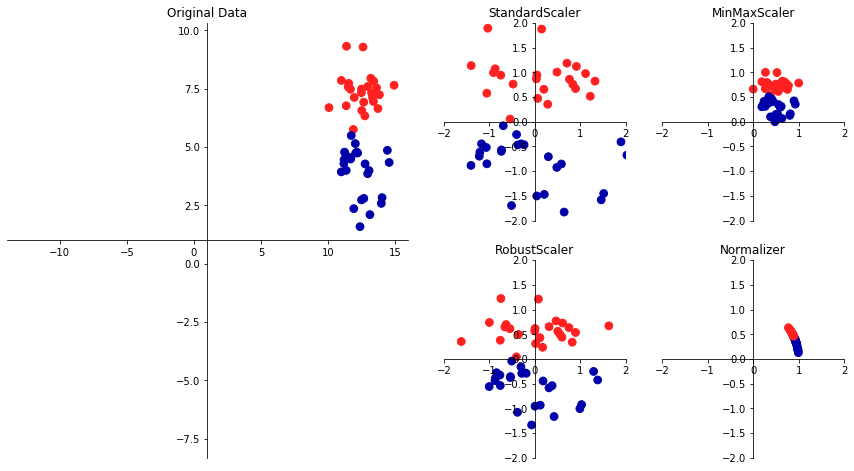

In [39]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_scaling()
#anaconda프롬프트 ->pip install mglearn 

#표준편차를 구하는 이유:중심으로 부터 얼마나 떨어져 있는가
#분석에서는 분산이 커야 =>주성분 :z 점수=(관측치-평균)/표준편차
          #표준화=>표준정규분포 (확률)

In [52]:
import numpy as np
import pandas as pd
df=pd.DataFrame([[1,   np.nan,  2],
               [2,      3,      5],
               [np.nan,  4,     6]])
df





0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

In [51]:
df.dropna()

0    1  2
1  2.0  3.0  5

In [50]:
df.dropna(axis='columns')


2
0  2
1  5
2  6

In [54]:
df[3]=np.nan
df

0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN

In [55]:
df.dropna(axis='columns',how='all') #모두가 nan 


0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

In [56]:
data=pd.Series([1, np.nan, 2, None, 3],index=list('abced'))
data


a    1.0
b    NaN
c    2.0
e    NaN
d    3.0
dtype: float64

In [57]:
data.fillna(0)


a    1.0
b    0.0
c    2.0
e    0.0
d    3.0
dtype: float64

In [58]:
data.fillna(method='ffill') #forward fill 


a    1.0
b    1.0
c    2.0
e    2.0
d    3.0
dtype: float64

In [59]:
data.fillna(method='bfill') #backward fill

a    1.0
b    2.0
c    2.0
e    3.0
d    3.0
dtype: float64

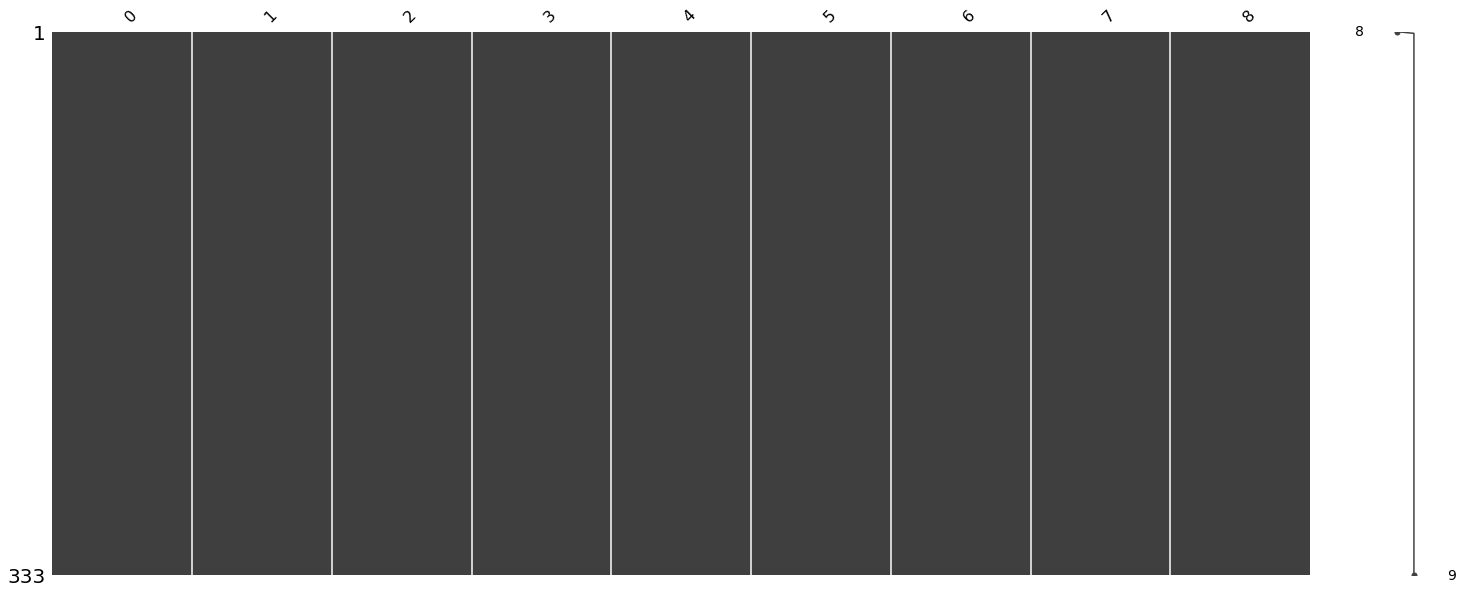

In [42]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('diab.csv', header = None)
msno.matrix(df)
plt.show()

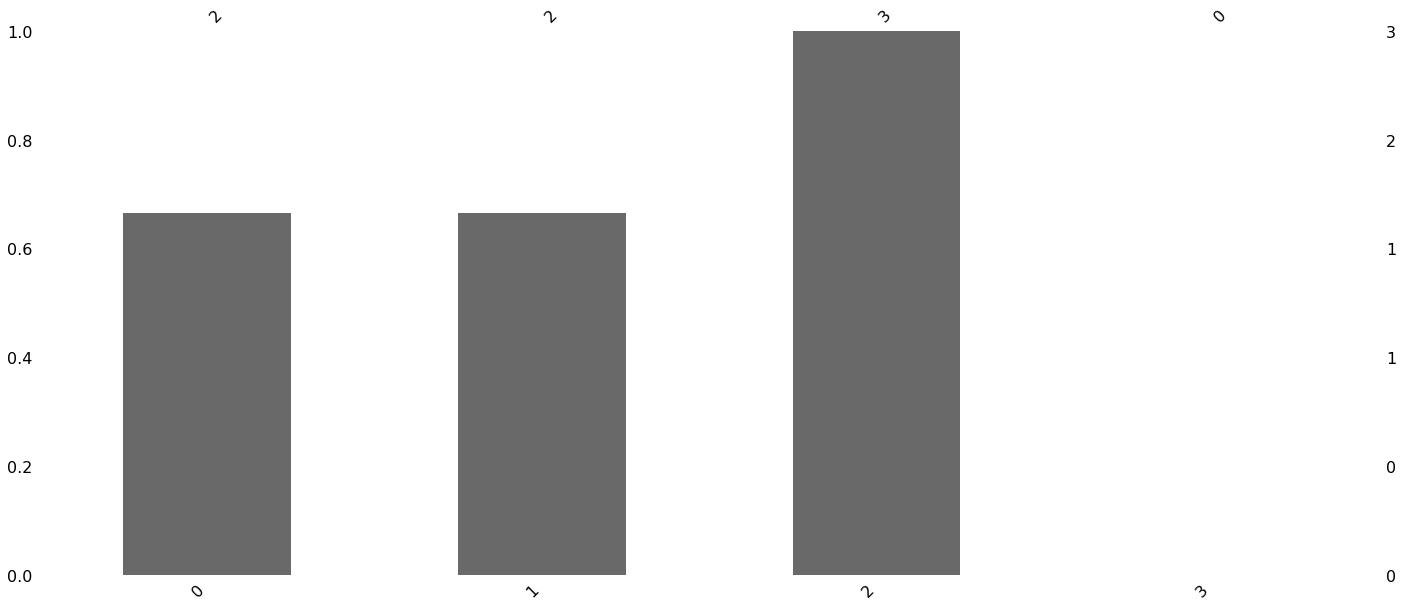

In [62]:
msno.bar(df)
plt.show()

In [43]:
df.dropna()

0   1    2   3   4     5      6   7    8
1      1.0   6  148  72  35  33.6  0.627  50  Yes
2      2.0   1   85  66  29  26.6  0.351  31   No
3      3.0   1   89  66  23  28.1  0.167  21   No
4      4.0   3   78  50  32    31  0.248  26  Yes
5      5.0   2  197  70  45  30.5  0.158  53  Yes
..     ...  ..  ...  ..  ..   ...    ...  ..  ...
328  328.0   2   88  58  26  28.4  0.766  22   No
329  329.0   9  170  74  31    44  0.403  43  Yes
330  330.0  10  101  76  48  32.9  0.171  63   No
331  331.0   5  121  72  23  26.2  0.245  30   No
332  332.0   1   93  70  31  30.4  0.315  23   No

[332 rows x 9 columns]

In [22]:
import numpy as np
#숫자의 범위:0~100
df=pd.DataFrame({'value':np.random.randint(0,100,20)})
print(df)
labels=["{0}-{1}".format(i, i+9) for i in range(0,100,10)]
print(labels)


    value
0      71
1      63
2       0
3      66
4      51
5      45
6       3
7      78
8      71
9      49
10     77
11     23
12     23
13      5
14     81
15     70
16     45
17     82
18     55
19     40
['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']


In [24]:
#right=False 오른 쪽 끝은 제외
# 0~100 까지 10씩
df['group']=pd.cut(df.value,range(0,105,10),right=False,labels=labels) #자동으로 잘라줌 .문자열 라벨을 이용해 범주화
print(df['group'])


0     70-79
1     60-69
2       0-9
3     60-69
4     50-59
5     40-49
6       0-9
7     70-79
8     70-79
9     40-49
10    70-79
11    20-29
12    20-29
13      0-9
14    80-89
15    70-79
16    40-49
17    80-89
18    50-59
19    40-49
Name: group, dtype: category
Categories (10, object): [0-9 < 10-19 < 20-29 < 30-39 ... 60-69 < 70-79 < 80-89 < 90-99]


In [26]:
#범주화
raw_cat=pd.Categorical(['a','b','c','a'],
                      categories=['b','c','d'],ordered=False)
raw_cat

[NaN, b, c, NaN]
Categories (3, object): [b, c, d]

In [28]:
#원핫 인코딩:선형회귀에서 범주형 변수는 반드시 실행
#연속형+범주형일때 범주형은 반드시 원핫 인코딩을 해줘야함
df=pd.DataFrame({'key':['b','b','a','c','a','b'],
                'data1':range(6)})
pd.get_dummies(df['key']) #one hot 인코딩

a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0

In [33]:
from pandas import Series,DataFrame
#dict 키는 중복이 안됨
#DataFrame =dict +중복을 허용하고 순서를 보장

df1=DataFrame({'key':['b','b','a','c','a','a','b'],
              'data1':range(7)})
print(df1)
df2=DataFrame({'key':['a','b','d'],'data2':range(3)})
print(df2)
print(pd.merge(df1,df2,how='inner')) #있는 것만
print(pd.merge(df1,df2,on='key')) #키값 일치


  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2
  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0
  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0


In [32]:
print(pd.merge(df1,df2,left_on='key',right_on='key'))
print(pd.merge(df1,df2,how='outer')) #일치하지 않는 것도 다

  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0
  key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    6.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   a    5.0    0.0
6   c    3.0    NaN
7   d    NaN    2.0


In [67]:
#인덱스 이름:계층적인덱스를 생성
#one,two, three 의 이름은 number
#ohio, colorado 의 이름은 state
data=DataFrame(np.arange(6).reshape(2,3),index=pd.Index(['Ohio','Colorado'],name='state'),
              columns=pd.Index(['one','two','three'],name='number'))
print(data)


number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
분리


In [65]:
result=data.stack()  #R에서 함수는 melt 
print('분리')

분리


In [66]:
print(result)

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32


In [68]:
print(result.unstack())

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [71]:
data=pd.DataFrame({'k1':['one']*3+['two']*4,'k2':[1,1,2,3,3,4,4]})
print(data)
print("중복")
print(data.duplicated())
print(data.drop_duplicates()) #원본을 제거하는 것이 아님
data['v1']=range(7)
print(data)



    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4
중복
0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool
    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4
    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6


In [ ]:
#원본을 제거하려면 
#data=data.drop_duplicates())

In [72]:
data.drop_duplicates(['k1','k2']) #포인터에 의해서 전달되기 때문에


k1  k2  v1
0  one   1   0
2  one   2   2
3  two   3   3
5  two   4   5

In [73]:
data.drop_duplicates(['k1','k2'],keep='last')

k1  k2  v1
1  one   1   1
2  one   2   2
4  two   3   4
6  two   4   6

In [74]:
data=Series([1.,-999.,2.,-999.,-1000.,3.])
print(data)
print('일정데이터를 nan으로 ',data.replace(-999,np.nan))
print('변경',data.replace([-999,-1000],np.nan))
print('짝으로',data.replace([-999,-1000],[np.nan,0]))  #[],[] 서로 앞에는 앞에,뒤에는 뒤에
print(data.replace({-999:np.nan,-1000:0})) #키:데이터 형식으로 가능

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64
일정데이터를 nan으로  0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
변경 0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
짝으로 0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


In [80]:
#문제:
data=DataFrame(np.arange(12).reshape((3,4)),index=['Ohio','Colorade','New York'],
               columns=['one','two','three','four'])

In [ ]:
#index 의 단어를 모두 대문자로 변경하시오

In [81]:
data.index = data.index.map(str.upper)
data

one  two  three  four
OHIO        0    1      2     3
COLORADE    4    5      6     7
NEW YORK    8    9     10    11

In [82]:
#첫자만 대문자로 바꿔줌 titlecase
data.rename(index=str.title,columns=str.upper)

ONE  TWO  THREE  FOUR
Ohio        0    1      2     3
Colorade    4    5      6     7
New York    8    9     10    11

In [85]:
#특정한것만
data.rename(index={'Ohio':'Indiana'},
            columns={'three':"peekaboo"})

one  two  peekaboo  four
OHIO        0    1         2     3
COLORADE    4    5         6     7
NEW YORK    8    9        10    11

In [90]:
#다음데이터를 18~25,25~35,35~60,60~100 사이의 값으로 범주화 하시오

age=[20,22,25,27,21,24,37,31,61,45,41,32]


In [93]:
bins=[18,25,35,60,100]
cats=pd.cut(age,bins)  #right=True 디폴트이므로 오른쪽 포함
print('범주화한 데이터',cats)

범주화한 데이터 [(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]


In [ ]:
#범주화=>숫자로 매핑,종류별로 숫자화
print('code',cats.codes)
print('범주의 종류는',cats.categories)
#범주별로 도수분포표를 작성하시오
print('범주별로 카운터 한 결과',pd.value_counts(cats)) #pd.value_counts 도수 분포표 만드는 함수

In [ ]:
#참고: 비연속적 데이터를 범주화 할때 
bins=[(0,1),(5,7),(10,14)]
pd.Intervalndex.from_tuples(bins,closed=closed)
x=pd.cut(array,_bins)

In [ ]:
#문제1.첫번째 칼럼의 이름을 ID_area로 지정하시오
#문제2.regions의 값들을 중복하지 않고 몇개의 범주인지 확인하시오
#문제3.처음 칼럼(ID_area)에 들어온 이상한 숫자를 제거하시오
#문제4.산성관련성분인 'palmitic','palmitoleic','stearic','oleic','linoleic','linolenic','arachidic','eicosenoic'의 칼럼만 추려서
    #별도의  sub 데이터 프레임(변수이름=dfsub)를 생성하시오
#문제5.dfsub의 데이터를 모두 100으로 나누어 소수점으로 나타내시오
#문제6.palmitic 산과 linolenic 산의 분포도를 시각화하시오
#문제7.groupby를 활용하여 region을 기준으로 묶어서 region_groupby객체로 생성
#문제8.region_groupby에 describe()메소드를 적용하여 출력해보시오

In [108]:
olive=pd.read_csv('olive.csv')
olive
olive.dtypes
print(olive.dtypes)
olive.describe()

Unnamed: 0     object
region          int64
area            int64
palmitic        int64
palmitoleic     int64
stearic         int64
oleic           int64
linoleic        int64
linolenic       int64
arachidic       int64
eicosenoic      int64
dtype: object


region        area     palmitic  palmitoleic     stearic  \
count  572.000000  572.000000   572.000000   572.000000  572.000000   
mean     1.699301    4.599650  1231.741259   126.094406  228.865385   
std      0.859968    2.356687   168.592264    52.494365   36.744935   
min      1.000000    1.000000   610.000000    15.000000  152.000000   
25%      1.000000    3.000000  1095.000000    87.750000  205.000000   
50%      1.000000    3.000000  1201.000000   110.000000  223.000000   
75%      3.000000    7.000000  1360.000000   169.250000  249.000000   
max      3.000000    9.000000  1753.000000   280.000000  375.000000   

             oleic     linoleic   linolenic   arachidic  eicosenoic  
count   572.000000   572.000000  572.000000  572.000000  572.000000  
mean   7311.748252   980.527972   31.888112   58.097902   16.281469  
std     405.810222   242.799221   12.968697   22.030250   14.083295  
min    6300.000000   448.000000    0.000000    0.000000    1.000000  
25%    7000.000000   770.750000   26.000000   50.000000    2.000000  
50%    7302.500000  1030.000000   33.000000   61.000000   17.000000  
75%    7680.000000  1180.750000   40.250000   70.000000   28.000000  
max    8410.000000  1470.000000   74.000000  105.000000   58.000000

In [128]:
#문제1
#olive=olive.rename[{'area':'ID_area'},axis="columns"]
olive.rename(columns={olive.columns[0]:'ID_area'}, inplace=True)
print(olive)

          ID_area  region  area  palmitic  palmitoleic  stearic  oleic  \
0    North-Apulia       1     1      1075           75      226   7823   
1    North-Apulia       1     1      1088           73      224   7709   
2    North-Apulia       1     1       911           54      246   8113   
3    North-Apulia       1     1       966           57      240   7952   
4    North-Apulia       1     1      1051           67      259   7771   
..            ...     ...   ...       ...          ...      ...    ...   
567  West-Liguria       3     8      1280          110      290   7490   
568  West-Liguria       3     8      1060          100      270   7740   
569  West-Liguria       3     8      1010           90      210   7720   
570  West-Liguria       3     8       990          120      250   7750   
571  West-Liguria       3     8       960           80      240   7950   

     linoleic  linolenic  arachidic  eicosenoic  
0         672         36         60          29  
1         7

In [126]:
#문제2.regions의 값들을 중복하지 않고 몇개의 범주인지 확인하시오
olive.region.unique()
olive.area.unique()

#교차분석표 crossab
pd.crosstab(olive.area,olive.region)


region    1   2   3
area               
1        25   0   0
2        56   0   0
3       206   0   0
4        36   0   0
5         0  65   0
6         0  33   0
7         0   0  50
8         0   0  50
9         0   0  51

In [127]:
#문제3.처음 칼럼(ID_area)에 들어온 이상한 숫자를 제거하시오
olive['ID_area']=olive['ID_area'].apply(lambda x:x.split('.')[1])
olive

IndexError: list index out of range

In [118]:
#문제4.산성관련성분인 'palmitic','palmitoleic','stearic','oleic','linoleic','linolenic','arachidic','eicosenoic'의 칼럼만 추려서
    #별도의  sub 데이터 프레임(변수이름=dfsub)를 생성하시오
acidict=['palmitic','palmitoleic','stearic','oleic','linolenic','linolenic','arachidic','eicosenoic']
olivesub=olive[acidict]
olivesub.head()


palmitic  palmitoleic  stearic  oleic  linolenic  linolenic  arachidic  \
0      1075           75      226   7823         36         36         60   
1      1088           73      224   7709         31         31         61   
2       911           54      246   8113         31         31         63   
3       966           57      240   7952         50         50         78   
4      1051           67      259   7771         50         50         80   

   eicosenoic  
0          29  
1          29  
2          29  
3          35  
4          46

In [129]:
#문제5.dfsub의 데이터를 모두 100으로 나누어 소수점으로 나타내시오
olivesub=olive[acidict].apply(lambda x :x/100)
olive[acidict]=olivesub #원본데이터

In [130]:
#문제6.palmitic 산과 linolenic 산의 분포도를 시각화하시오
fig=plt.figure()
plt.scatter(olive['palmitic '],olive['linolenic ']
axis=fig.gca()
axis.set_title('linolenic vs palmitic ')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic ')

SyntaxError: invalid syntax (<ipython-input-130-63eaae659685>, line 4)

In [114]:
#문제7.groupby를 활용하여 region을 기준으로 묶어서 region_groupby객체로 생성
region_groupby=olive.groupby(['region']) # region_groupby객체


In [ ]:
#문제8.region_groupby에 describe()메소드를 적용하여 출력해보시오
region_groupby.apply(np.mean) #aggFunc
region_groupby.apply(lambda x: x.mean())
region_groupby.describe()